<a href="https://colab.research.google.com/github/AmirGhnbr/Mnist_fashion_tensorflow/blob/dev_branch/Mnist_fashion_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

print(tf.__version__)

2.8.2


# loading Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
train_data.shape , train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

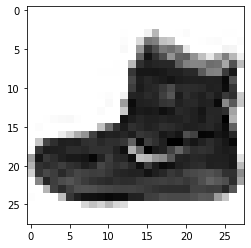

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0],cmap = plt.cm.binary) 

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [7]:
import pandas as pd
def plot_model(model_history):
  pd.DataFrame(model_history.history).plot()

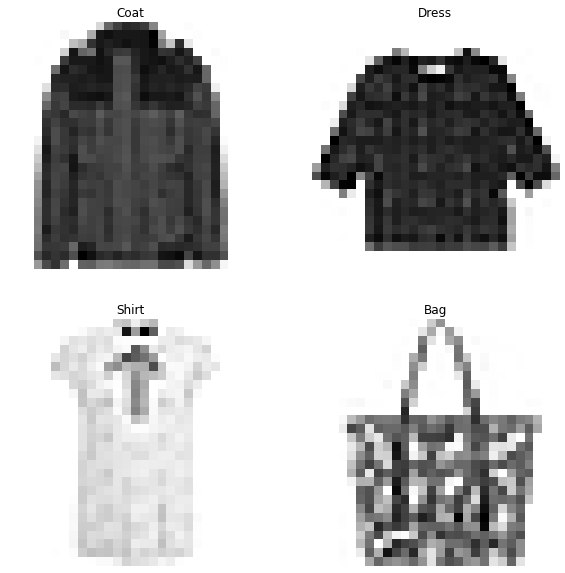

In [8]:
import random
plt.figure(figsize=(10, 10))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [9]:
## build the first nn
tf.random.set_seed(42)

## use sequential api
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150 ,activation="relu"),
    tf.keras.layers.Dense(150 ,activation="relu"),
    tf.keras.layers.Dense(10 ,activation="softmax")
])

## compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## fit the model
model_1_history = model_1.fit(train_data, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9300 - accuracy: 0.7292
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6469 - accuracy: 0.7865
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6189 - accuracy: 0.7953
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5631 - accuracy: 0.8148
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5178 - accuracy: 0.8238
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4625 - accuracy: 0.8379
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4349 - accuracy: 0.8459
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4284 - accuracy: 0.8489
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4061 - accuracy: 0.8554
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4

In [10]:
model_1.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4771 - accuracy: 0.8418


[0.4771375358104706, 0.8417999744415283]

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


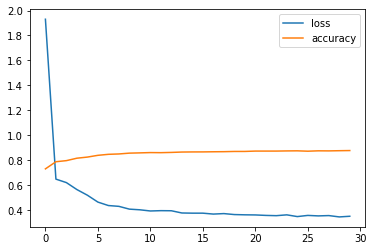

In [12]:
plot_model(model_1_history)

In [13]:
## preprocess the data 
train_data.min(), train_data.max()

(0, 255)

In [14]:
train_data_norm = train_data / 255
test_data_norm =test_data / 255

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
## Build model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150 ,activation="relu"),
    tf.keras.layers.Dense(150 ,activation="relu"),
    tf.keras.layers.Dense(10 ,activation="softmax")
])

## compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## fit the model
model_2_history = model_2.fit(train_data_norm, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4804 - accuracy: 0.8270
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3573 - accuracy: 0.8691
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3255 - accuracy: 0.8798
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3022 - accuracy: 0.8888
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2840 - accuracy: 0.8931
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2704 - accuracy: 0.8976
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2576 - accuracy: 0.9028
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2483 - accuracy: 0.9071
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2377 - accuracy: 0.9098
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.230

In [16]:
model_2.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4794 - accuracy: 0.8847


[0.47938597202301025, 0.8847000002861023]

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 150)               117750    
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


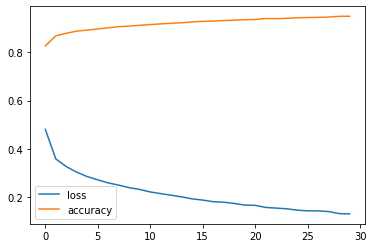

In [18]:
plot_model(model_2_history)

### 8% improvement in training accuracy and 4% improvement in test accuracy

## Build the next model with different activation function

In [19]:
## Build the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150, activation= "selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(150, activation= "selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(10, activation= "softmax")
])

## compile the model
model_3.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

## fit the model
model_3_history=model_3.fit(train_data_norm, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5020 - accuracy: 0.8193
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3849 - accuracy: 0.8587
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3515 - accuracy: 0.8709
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3239 - accuracy: 0.8802
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3052 - accuracy: 0.8852
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2888 - accuracy: 0.8911
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2762 - accuracy: 0.8963
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2655 - accuracy: 0.8994
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2534 - accuracy: 0.9044
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.246

In [20]:
model_3.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4430 - accuracy: 0.8921


[0.4429684579372406, 0.8920999765396118]

In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               117750    
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dense_8 (Dense)             (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


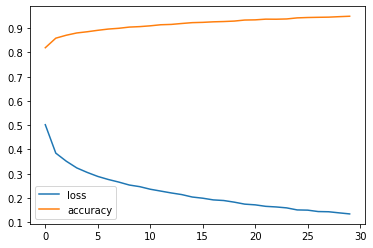

In [22]:
plot_model(model_3_history)

### use elu activation function 

In [23]:
## build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150, activation= "elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(150, activation= "elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation= "softmax")
])

## compile the model
model_4.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## fit the model
model_4_history = model_4.fit(train_data_norm, train_labels, epochs=30)


Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4733 - accuracy: 0.8285
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3630 - accuracy: 0.8659
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3290 - accuracy: 0.8779
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3054 - accuracy: 0.8876
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2847 - accuracy: 0.8925
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2679 - accuracy: 0.8987
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2570 - accuracy: 0.9021
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2455 - accuracy: 0.9069
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2319 - accuracy: 0.9117
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.223

In [24]:
model_4.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5099 - accuracy: 0.8813


[0.509943425655365, 0.8812999725341797]

In [25]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 150)               117750    
                                                                 
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 dense_11 (Dense)            (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


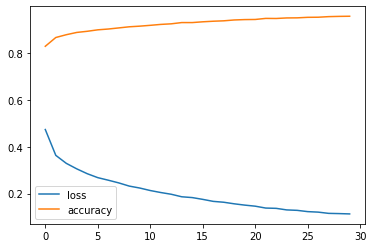

In [26]:
plot_model(model_4_history)

### model with elu activation is performing well 

### use BatchNormalization to reduce the danger of vanishing and exploding gradiants

In [28]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150, activation= "elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(150, activation= "elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation= "softmax")
])

# compile the model
model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model into training_data_norm
model_5_history=model_5.fit(train_data_norm, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4676 - accuracy: 0.8325
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3638 - accuracy: 0.8682
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3264 - accuracy: 0.8803
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3016 - accuracy: 0.8895
Epoch 5/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2822 - accuracy: 0.8942
Epoch 6/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2636 - accuracy: 0.9024
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2530 - accuracy: 0.9050
Epoch 8/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2423 - accuracy: 0.9081
Epoch 9/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2288 - accuracy: 0.9142
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 

In [29]:
model_5.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4367 - accuracy: 0.8837


[0.4367150366306305, 0.8837000131607056]

In [30]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               117750    
                                                                 
 batch_normalization (BatchN  (None, 150)              600       
 ormalization)                                                   
                                                                 
 dense_13 (Dense)            (None, 150)               22650     
                                                                 
 batch_normalization_1 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 10)               

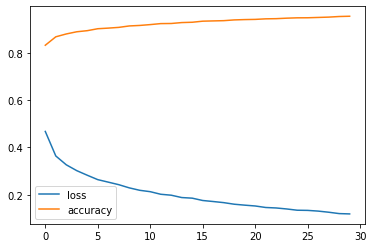

In [31]:
plot_model(model_5_history)

### Schedule the learning rate

In [34]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150, activation= "elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(150, activation= "elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation= "softmax")
])

# compile the model
model_6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# learning rate schedule callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model into training_data_norm
model_6_history=model_5.fit(train_data_norm, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1640 - accuracy: 0.9387
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1549 - accuracy: 0.9421
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1509 - accuracy: 0.9435
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1460 - accuracy: 0.9448
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1392 - accuracy: 0.9481
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1377 - accuracy: 0.9486
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1386 - accuracy: 0.9469
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1391 - accuracy: 0.9470
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1340 - accuracy: 0.9493
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step - l

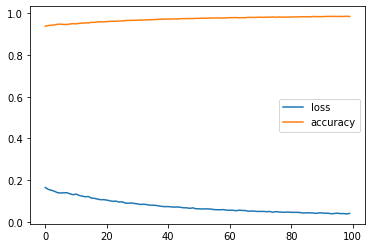

In [35]:
plot_model(model_6_history)

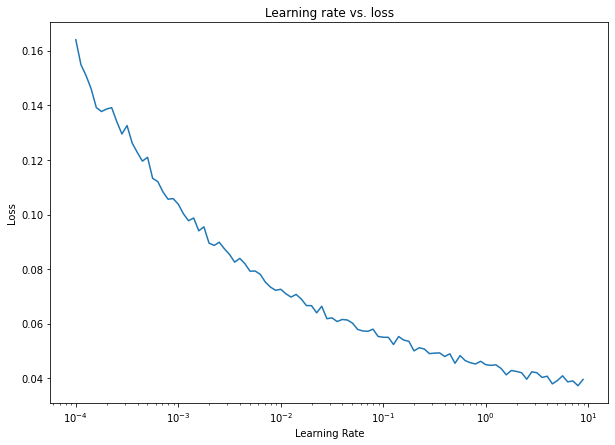

In [36]:
import numpy as np

# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_6_history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

### We can use 10 as learning rate